### S&P500 

In this notebook we download the S&P500 dataset from the yahoofinance library and we perform a first Exploartory Data Analysis.

In [39]:
# import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [12]:
data = yf.download("SPY", start="2015-01-01", end="2015-12-31")

[*********************100%***********************]  1 of 1 completed


In [14]:
# as sanity check to see that the loading worked present the first few line of the dataset
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,207.990005,208.190002,205.389999,205.539993,181.073181,130333800
2015-01-02,206.380005,206.880005,204.179993,205.429993,180.976196,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,177.707840,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,176.034058,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,178.227631,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,181.390305,147217800
2015-01-09,206.399994,206.419998,203.509995,204.250000,179.936691,158567300
2015-01-12,204.410004,204.600006,201.919998,202.649994,178.527176,144396100
2015-01-13,204.119995,205.479996,200.509995,202.080002,178.024979,214553300


We decided to keep the column 'Close' and 'Volume' that respectively represent the daily closing value of the S&P500 and the stock trading volume. 

In [16]:
remove_columns=['Open','High','Low','Adj Close']
data=data.drop(remove_columns,axis=1)

In [17]:
data.head(5)

,Close,Volume
Date,,
2014-12-31,205.539993,130333800
2015-01-02,205.429993,121465900
2015-01-05,201.720001,169632600
2015-01-06,199.820007,209151400
2015-01-07,202.309998,125346700


#### Missing values

In [18]:
data.index

DatetimeIndex(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-16', '2015-12-17', '2015-12-18', '2015-12-21',
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-28',
               '2015-12-29', '2015-12-30'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

We compared the index 'Date' with the 2015 calendar and noticed that in the index there are some missing values that correspond with weekends and festivity days, for instance in the sample the we showed before we can notice that 2015-01-03 and 2015-01-04 are missing because they're respectively saturday and sunday.

In [25]:
data

,Close,Volume
Date,,
2014-12-31,205.539993,130333800
2015-01-02,205.429993,121465900
2015-01-05,201.720001,169632600
2015-01-06,199.820007,209151400
2015-01-07,202.309998,125346700
...,...,...
2015-12-23,206.020004,110987200
2015-12-24,205.679993,48539600
2015-12-28,205.210007,65899900


In [22]:
# check that no NaN vaues are present
data.isnull().sum()

Close     0
Volume    0
dtype: int64

#### Data visualization 

<AxesSubplot:xlabel='Date', ylabel='Volume'>

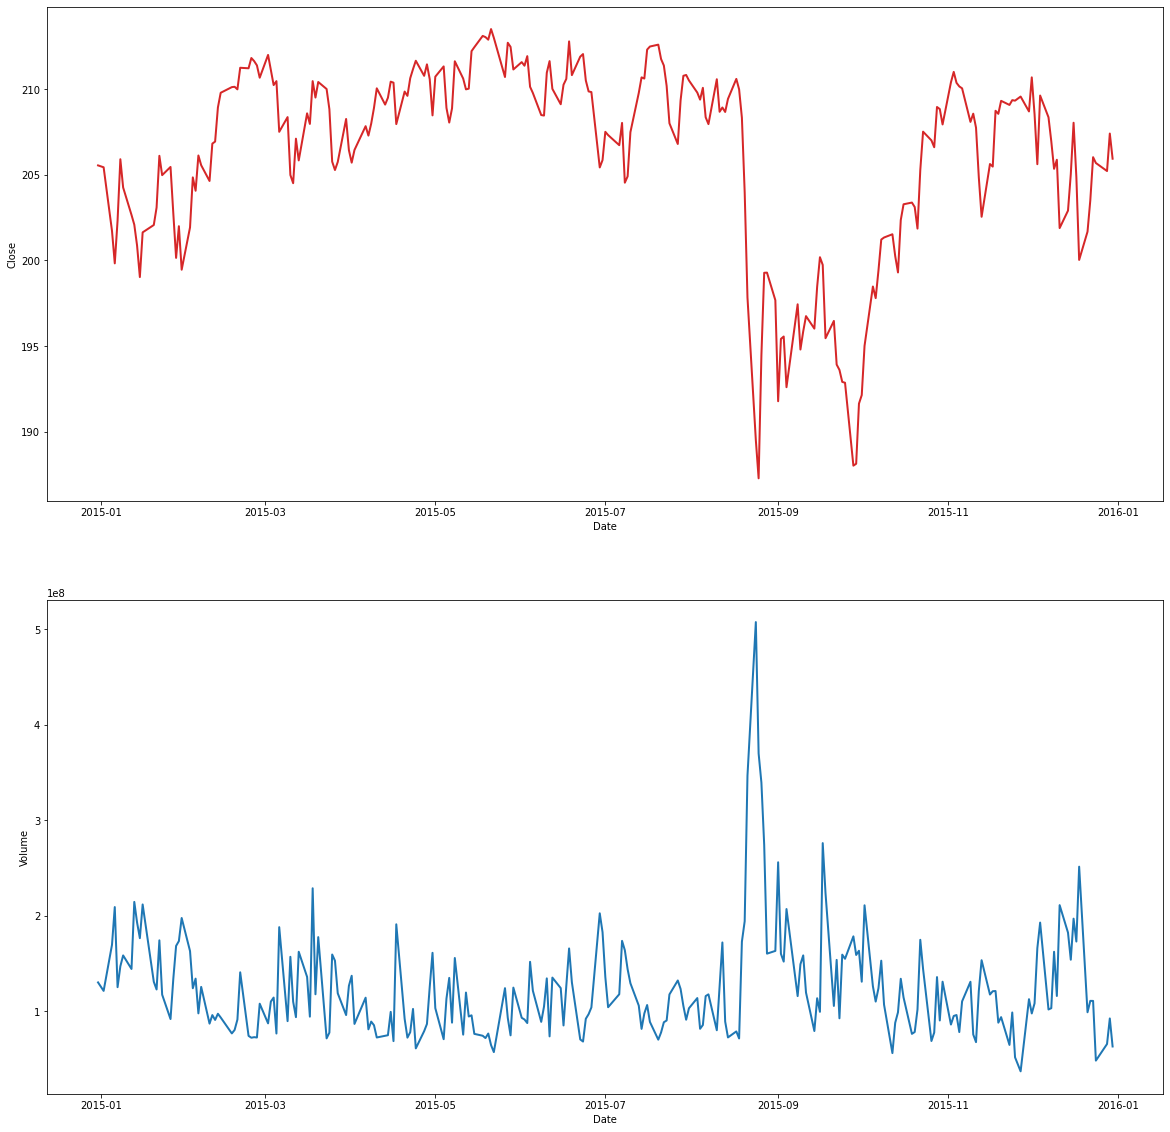

In [77]:
fig,ax=plt.subplots(2,1,figsize=(20,20))
sns.lineplot(data=data,x='Date',y='Close',color='tab:red',ax=ax[0],linewidth=2)
sns.lineplot(data=data,x='Date',y='Volume',ax=ax[1],linewidth=2)

The two graphs above plot, respectively, the 'Close' and 'Volume' values over time. For better visual interpretabilty, in these graphs we interpolated the missing values.

In [43]:
data=data.reset_index()

<AxesSubplot:xlabel='Date', ylabel='Volume'>

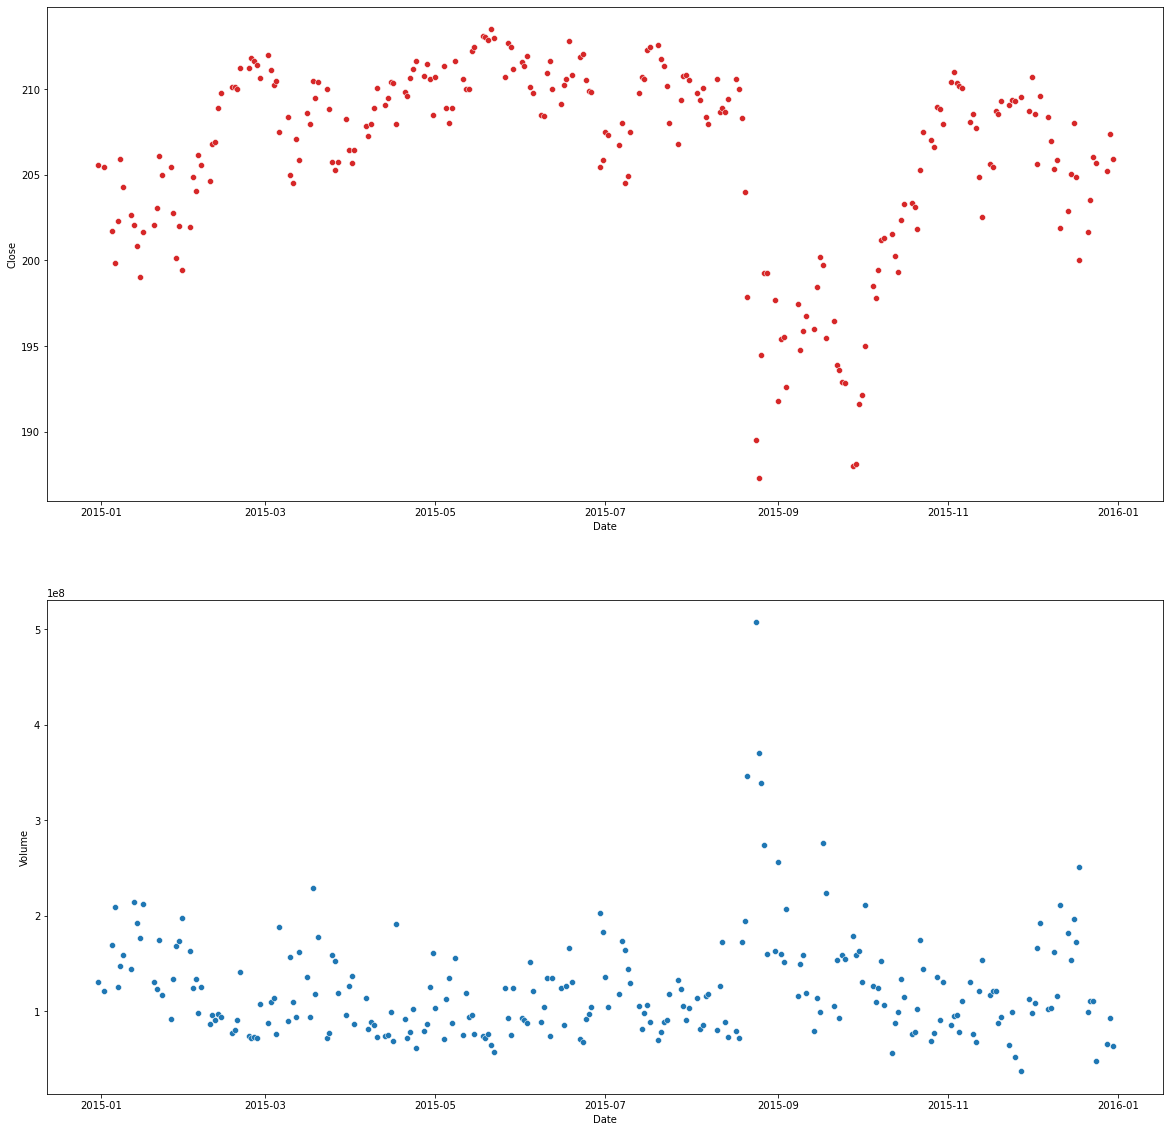

In [76]:
fig,ax=plt.subplots(2,1,figsize=(20,20))
sns.scatterplot(data=data,x='Date',y='Close',color='tab:red',ax=ax[0])
sns.scatterplot(data=data,x='Date',y='Volume',ax=ax[1])

For completeness, we present also the visualization of the 'Close' and 'Volume' values without interpolating the missing values.